In [ ]:
from google.colab import files
files.upload()

Saving kospi200_20090601_20090710.csv to kospi200_20090601_20090710.csv


{'kospi200_20090601_20090710.csv': b'\xc0\xcf\xc0\xda,\xc1\xbe\xb0\xa1,\xb4\xeb\xba\xf1,\xb5\xee\xb6\xf4\xb7\xfc,\xbd\xc3\xb0\xa1,\xb0\xed\xb0\xa1,\xc0\xfa\xb0\xa1,\xb0\xc5\xb7\xa1\xb7\xae,\xb0\xc5\xb7\xa1\xb4\xeb\xb1\xdd,\xbb\xf3\xc0\xe5\xbd\xc3\xb0\xa1\xc3\xd1\xbe\xd7\n"2009/07/10","184.56","-0.16","-0.09","185.27","185.43","182.84","121806.0","3654547.0","6.4262035E8"\n"2009/07/09","184.72","-0.01","-0.01","184.26","186.51","183.94","147954.0","4720080.0","6.43629513E8"\n"2009/07/08","184.73","-0.38","-0.21","183.86","184.73","182.28","152507.0","4179328.0","6.43918886E8"\n"2009/07/07","185.11","0.61","0.33","185.18","186.02","184.20","163708.0","4110109.0","6.45156637E8"\n"2009/07/06","184.50","1.58","0.86","182.78","185.04","182.36","140128.0","3748011.0","6.42849362E8"\n"2009/07/03","182.92","1.07","0.59","179.11","182.92","179.02","139037.0","3355239.0","6.37968002E8"\n"2009/07/02","181.85","-0.10","-0.05","182.92","182.96","180.80","163024.0","3813533.0","6.3419248E8"\n"2009/07

In [ ]:
import pandas as pd
dfKS200 = pd.read_csv('kospi200_20090601_20090710.csv', header=0, encoding= 'unicode_escape', 
                      names=['일자', '종가', '대비', '등락율','시가', '고가', '저가', '거래량', '거래대금', '상장시가총액'], index_col='일자')
dfKS200['종가'].describe()

count     30.000000
mean     179.900667
std        3.174971
min      174.320000
25%      177.777500
50%      179.795000
75%      181.925000
max      185.110000
Name: 종가, dtype: float64

(array([0.09267841, 0.0617856 , 0.0308928 , 0.09267841, 0.18535681,
        0.09267841, 0.12357121, 0.09267841, 0.        , 0.15446401]),
 array([174.32 , 175.399, 176.478, 177.557, 178.636, 179.715, 180.794,
        181.873, 182.952, 184.031, 185.11 ]),
 <a list of 10 Patch objects>)

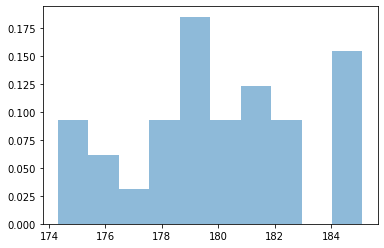

In [ ]:
import matplotlib.pyplot as plt
plt.hist(dfKS200['종가'], density=True, alpha=0.5)

In [ ]:
dfKS200['등락율'].describe()

count    30.000000
mean      0.114333
std       1.258263
min      -2.630000
25%      -0.255000
50%       0.045000
75%       0.672500
max       3.430000
Name: 등락율, dtype: float64

In [ ]:
import numpy as np
dfKS200['log_return'] = np.log(dfKS200['종가']) - np.log(dfKS200['종가'].shift(1))

In [ ]:
dfKS200.log_return.describe()

count    29.000000
mean     -0.000691
std       0.012608
min      -0.033728
25%      -0.006190
50%       0.000054
75%       0.002625
max       0.026605
Name: log_return, dtype: float64

In [ ]:
r = (1+dfKS200.log_return.describe()['mean']) ** 27

In [ ]:
K = 426.36 * r

In [ ]:
K

418.47987050718865

In [ ]:
r

0.9815176623210166

In [ ]:
import seaborn

In [ ]:
7.81 / 426.36 + 1

1.0183178534571724

In [ ]:
1 - 9.60 / 426.36

0.9774838164931045

In [ ]:
spot_price = 426.36
# Short put
strike_price_short_put = spot_price * r
premium_short_put = 9.60
# Short call
strike_price_short_call = strike_price_short_put
premium_short_call = 7.81
# Stock price range at expiration of the put
sT = np.arange(300, 500, 1)

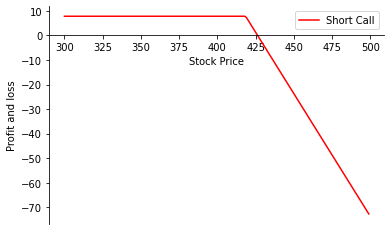

In [ ]:
def short_call_payoff(sT, strike_price, premium):
    return np.where(sT > strike_price, strike_price - sT, 0) + premium

payoff_short_call = short_call_payoff (sT, strike_price_short_call, premium_short_call)
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT, payoff_short_call,label='Short Call',color='r')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

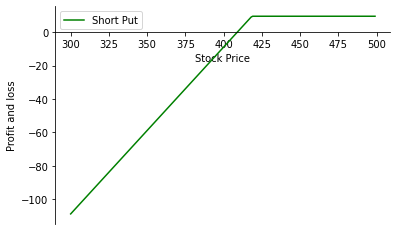

In [ ]:
def short_put_payoff(sT, strike_price, premium):
    return np.where(sT < strike_price, sT - strike_price, 0) + premium 

payoff_short_put = short_put_payoff(sT, strike_price_short_put, premium_short_put)
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center
ax.plot(sT,payoff_short_put,label='Short Put',color='g')
plt.xlabel('Stock Price')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

Max Profit: 16.93012949281135
Max Loss: Unlimited


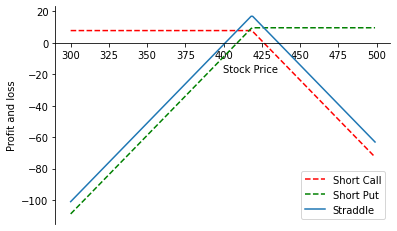

In [ ]:
payoff_straddle = payoff_short_call + payoff_short_put

print (f'Max Profit: {payoff_straddle.max()}')
print ("Max Loss:", "Unlimited")
# Plot
fig, ax = plt.subplots()
ax.spines['top'].set_visible(False) # Top border removed 
ax.spines['right'].set_visible(False) # Right border removed
ax.spines['bottom'].set_position('zero') # Sets the X-axis in the center

ax.plot(sT,payoff_short_call,'--',label='Short Call',color='r')
ax.plot(sT,payoff_short_put,'--',label='Short Put',color='g')

ax.plot(sT,payoff_straddle,label='Straddle')
plt.xlabel('Stock Price', ha='left')
plt.ylabel('Profit and loss')
plt.legend()
plt.show()

In [ ]:
from scipy.stats import norm
stddev = 0.012608
mean = 0.9815176623210166

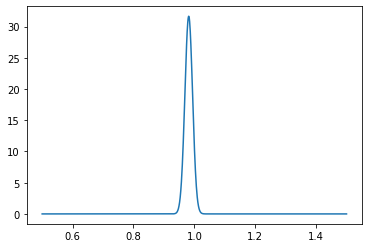

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0.5, 1.5,1000)
plt.plot(x, norm.pdf(x, mean, stddev))
plt.show()
# pl.plot(x,dist.cdf(x))

In [ ]:
norm.cdf(1.0183178534571724, mean, stddev) - norm.cdf(0.9774838164931045, mean, stddev)

0.6237374391082874